In [390]:
import numpy as np
from sklearn.mixture import GaussianMixture
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt
np.random.seed(100)


In [391]:
data = np.loadtxt("gmm_data_f23.txt", dtype=float)

In [392]:
data

array([[ 0.40849 ,  0.136345,  0.126171, -0.473229, -0.009169],
       [-0.778091,  3.929906, -4.072661,  6.068389, -5.039341],
       [-3.609156,  3.745537, -6.661379,  5.673406, -6.647482],
       ...,
       [-6.280328,  6.380823, -4.276902,  6.188341, -6.039408],
       [ 0.357173, -0.279818, -0.539074,  0.305735,  0.404557],
       [-4.056907,  4.921535, -4.645109,  6.163637, -6.29058 ]])

Part a) Assuming that Σi = σi2I, compute and write below the means μ1,μ2,μ3 and the standard deviations σ1,σ2,σ3. We highly recommend that you use the GaussianMixture model from sklearn. (Please use random initialization for this part, with random seed as 200 and a default convergence thresh- old/tolerance of 0.001)

In [393]:
gmm = GaussianMixture(n_components=3, random_state=200,tol=0.001 )
gmm.fit(data)

GaussianMixture(n_components=3, random_state=200)

In [394]:
#  np.sqrt(gmm.covariances_)
covariance = gmm.covariances_
stdev = np.sqrt(np.diagonal(covariance, axis1=1, axis2=2))


In [395]:
means = gmm.means_
means_skt = means


for i, cluster_mean in enumerate(means):
    print(f"Cluster {i+1} means: {cluster_mean}")
print()
for i, cluster_stdev in enumerate(stdev):
    print(f"Cluster {i+1} standard deviation: {cluster_stdev}")

Cluster 1 means: [-0.00197   0.001202 -0.001217  0.009048 -0.013004]
Cluster 2 means: [ 2.989983 -3.957417  5.023289 -5.929606  6.995245]
Cluster 3 means: [-3.072391  3.986052 -4.966652  6.03731  -6.929286]

Cluster 1 standard deviation: [0.250501 0.243867 0.248653 0.244086 0.255701]
Cluster 2 standard deviation: [0.960831 0.994322 1.017969 1.019229 1.016894]
Cluster 3 standard deviation: [0.996828 1.040548 0.964692 0.988741 1.016842]


Part b) From these computed means and std. deviations, cluster all the 3000 points, and plot three figures
 -  Plot the first two dimensions (xi1,xi2) with their cluster assignments.
 -  Plot the third and fourth dimensions (xi3,xi4) with their cluster assignments. 
 -  Plot the fourth and fifth dimensions (xi4,xi5) with their cluster assignments.

In [396]:
label_assigned = gmm.predict(data)

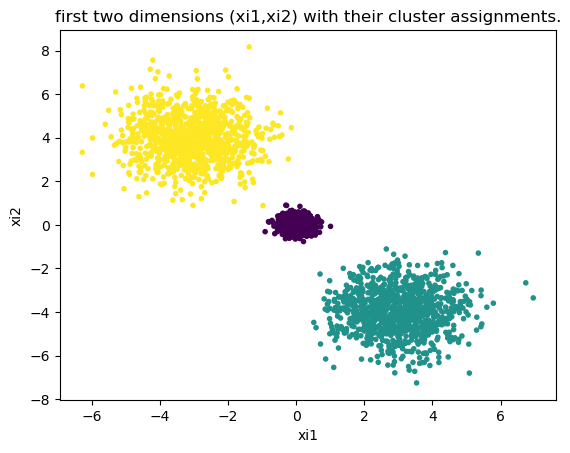

In [397]:
plt.scatter(data[:,0], data[:,1], c= label_assigned, marker = '.')
plt.title("first two dimensions (xi1,xi2) with their cluster assignments.")
plt.xlabel("xi1")
plt.ylabel("xi2")
plt.show()

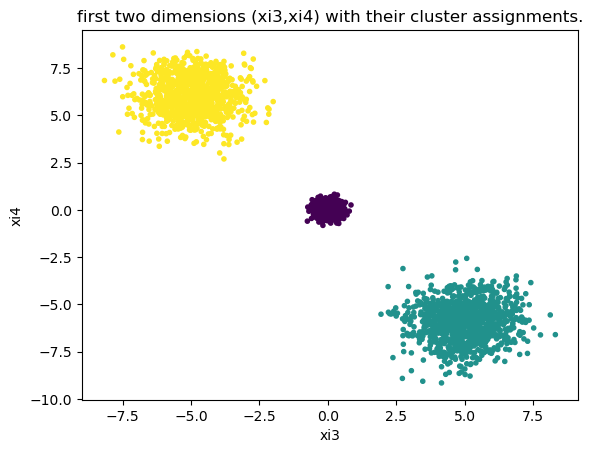

In [398]:
plt.scatter(data[:,2], data[:,3], c= label_assigned, marker = '.')
plt.title("first two dimensions (xi3,xi4) with their cluster assignments.")
plt.xlabel("xi3")
plt.ylabel("xi4")
plt.show()

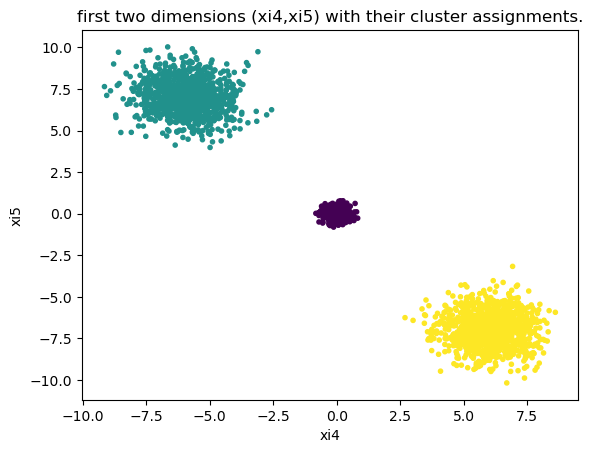

In [399]:
plt.scatter(data[:,3], data[:,4], c= label_assigned, marker = '.')
plt.title("first two dimensions (xi4,xi5) with their cluster assignments.")
plt.xlabel("xi4")
plt.ylabel("xi5")
plt.show()

In [400]:
# part c

In [401]:
W = gmm.weights_ 
cov = gmm.covariances_
X = data
cluster_num = 3
num_datapoints = 3000
r = np.zeros((num_datapoints,cluster_num))
means = np.random.rand(3,5)

In [402]:
#c
#E step 
def e_step(data, means, covariances,W_val):
    cluster_num = len(means)
    rnk = np.zeros((data.shape[0], cluster_num))

    for cluster in range(cluster_num):
        pdf = multivariate_normal.pdf(data, mean=means[cluster], cov=covariances[cluster])
        rnk[:, cluster] = pdf * W_val[cluster]

    sum_prob = np.sum(rnk, axis=1, keepdims=True)
    rnk /= sum_prob

    return rnk


#M step
def m_step(data, rnk):
    num_clusters = len(rnk[0])
    num_features = data.shape[1]
    updated_means = np.zeros((num_clusters, num_features))

    for cluster in range(num_clusters):
        cluster_rnk = rnk[:, cluster]
        total_rnk = np.sum(cluster_rnk)
        if total_rnk > 0:
            weighted_sum = np.sum(data * cluster_rnk[:, np.newaxis], axis=0)
            updated_means[cluster] = weighted_sum / total_rnk
        else:
            updated_means[cluster] = np.zeros(num_features)

    return updated_means

# EM algo
# iterate 1000 times until the convergence condition is met
init_mean = means

for i in range(1000):
    # Print the dimensions and types of variables
    rnk_all = e_step(data, init_mean, cov, W)
    fin_means = m_step(data, rnk_all)
    
    if np.mean(np.abs(fin_means-init_mean)) < 0.001:
        init_mean = fin_means
        print(f"Iteration terminated at iter {i}")
        for i, cluster_mean in enumerate(init_mean):
            print(f"Cluster {i+1} means: {cluster_mean}")
            
        for i, cluster_mean in enumerate(means_skt):
            print(f"Cluster sklearn {i+1} means: {cluster_mean}")
        break
    else:
        init_mean = fin_means      


Iteration terminated at iter 3
Cluster 1 means: [-0.00197   0.001202 -0.001217  0.009048 -0.013004]
Cluster 2 means: [ 2.989983 -3.957417  5.023289 -5.929606  6.995245]
Cluster 3 means: [-3.072391  3.986052 -4.966652  6.03731  -6.929286]
Cluster sklearn 1 means: [-0.00197   0.001202 -0.001217  0.009048 -0.013004]
Cluster sklearn 2 means: [ 2.989983 -3.957417  5.023289 -5.929606  6.995245]
Cluster sklearn 3 means: [-3.072391  3.986052 -4.966652  6.03731  -6.929286]


In [403]:
# part d

In [404]:
k =np.random.rand(3,)
W = k/np.sum(k)

cov = gmm.covariances_
X = data
cluster_num = 3
num_datapoints = 3000
r = np.zeros((num_datapoints,cluster_num))
means = np.random.rand(3,5)

In [405]:
def e_step(data, means, covariances,W_val):
    cluster_num = len(means)
    rnk = np.zeros((data.shape[0], cluster_num))

    for cluster in range(cluster_num):
        pdf = multivariate_normal.pdf(data, mean=means[cluster], cov=covariances[cluster])
        rnk[:, cluster] = pdf * W_val[cluster]

    sum_prob = np.sum(rnk, axis=1, keepdims=True)
    rnk /= sum_prob

    return rnk


#M step
def m_step(data, rnk):
    num_clusters = len(rnk[0])
    num_features = data.shape[1]
    updated_means = np.zeros((num_clusters, num_features))
    updated_W = np.zeros(num_clusters)
    for cluster in range(num_clusters):
        cluster_rnk = rnk[:, cluster]
        total_rnk = np.sum(cluster_rnk)
        if total_rnk > 0:
            weighted_sum = np.sum(data * cluster_rnk[:, np.newaxis], axis=0)
            updated_means[cluster] = weighted_sum / total_rnk
        else:
            updated_means[cluster] = np.zeros(num_features)
#     updated_W = np.zeros((3,1))
#     for i in range(3):
#         updated_W[i] = np.sum(rnk[i,:])/np.sum(rnk)
        updated_W[cluster] = total_rnk / np.sum(rnk)  # Corrected calculation

    return updated_means, updated_W

# EM algo
# iterate 1000 times until the convergence condition is met
init_mean = means

for i in range(1000):
    # Print the dimensions and types of variables
    rnk_all = e_step(data, init_mean, cov,W)
    fin_means, W = m_step(data, rnk_all)
    
    if np.mean(np.abs(fin_means-init_mean)) < 0.001:
        init_mean = fin_means
        for i, cluster_mean in enumerate(init_mean):
            print(f"Cluster {i+1} means: {cluster_mean}")
            
        for i, cluster_mean in enumerate(means_skt):
            print(f"Cluster sklearn {i+1} means: {cluster_mean}")
        print(f"Updated weights are: {W}")
        print(f"sklearn weights are: {gmm.weights_ }")

        break
    else:
        init_mean = fin_means      


Cluster 1 means: [-0.00197   0.001202 -0.001217  0.009048 -0.013004]
Cluster 2 means: [ 2.989983 -3.957417  5.023289 -5.929606  6.995245]
Cluster 3 means: [-3.072391  3.986052 -4.966652  6.03731  -6.929286]
Cluster sklearn 1 means: [-0.00197   0.001202 -0.001217  0.009048 -0.013004]
Cluster sklearn 2 means: [ 2.989983 -3.957417  5.023289 -5.929606  6.995245]
Cluster sklearn 3 means: [-3.072391  3.986052 -4.966652  6.03731  -6.929286]
Updated weights are: [0.333333 0.333333 0.333333]
sklearn weights are: [0.333333 0.333333 0.333333]


2c explained: Write down your E step and M step to estimate μ1,μ2,μ3. For the programming, please use a convergence threshold/tolerance of 0.001.

E Step

In the E step, I calculated the responsibilities (rnk) for each data point to belong to each cluster. This is achieved by computing the probability density function (pdf) of each data point for each cluster, scaled by the cluster's weight. The responsibilities are then normalized by dividing by the sum of responsibilities across all clusters for each data point.

M Step

In the M step, I updated the means of each cluster. This is done by calculating a weighted average of all data points, where the weights are the responsibilities calculated in the E step.

2d explained: Write down your E step and M step to estimate μ1,μ2,μ3. For the programming, please use a convergence threshold/tolerance of 0.001.

E Step

The E step remains the same as in part C. I calculated the responsibilities based on the current estimates of means, covariances, and weights.

M Step

In this M step, along with updating the means, I also updated the weights for each cluster. The updated weight for each cluster is the sum of responsibilities for that cluster divided by the total number of data points.